In [1]:
import csv
import pandas as pd
import seaborn as sns

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import seaborn as sns
sns.set_style("white") # if you don't like the grid: `whitegrid` --> `white`
sns.set_context("paper", font_scale = 2)
 

In [63]:
# load predictions (per residue)

conservation = pd.read_csv('../example_output/conservation_pred.txt', header=None)
secondary_structure = pd.read_csv('../example_output/dssp3_pred.txt', header=None) # H=Helix, E=Sheet, L=Other
secondary_structure_dssp = pd.read_csv('../example_output/dssp8_pred.txt', header=None)
membrane = pd.read_csv('../example_output/membrane_tmbed.txt', header=list(range(0,128)))
disorder = pd.read_csv('../example_output/seth_disorder_pred.csv', header=1)
binding_metal = pd.read_csv('../example_output/binding_bindEmbed_metal_pred.txt', header=None)
binding_nucleic = pd.read_csv('../example_output/binding_bindEmbed_nucleic_pred.txt', header=None)
binding_small_mol = pd.read_csv('../example_output/binding_bindEmbed_small_pred.txt', header=None)

In [3]:
# load predictions (per protein)

subcell = pd.read_csv('../example_output/la_subcell_pred.txt', header = None)
soluble = pd.read_csv('../example_output/la_mem_pred.txt', header = None)
cath_annotation = pd.read_csv('../example_output/prottucker_CATH_pred.csv', quotechar='"', header=None)
# there is an issue with CATH

### Secondary Structure (3 class)

In [4]:
# structure distribution
structures = {'Helix' : 0, 'Sheet':0, 'Other':0}
struct_map = {0 : 'Helix', 1 : 'Sheet', 2 : 'Other'}
id = 0
for index, row in secondary_structure.iterrows():
    counts = np.array([row[0].count('H'), row[0].count('E'), row[0].count('L')])
    struct = struct_map[np.argmax(counts)]
    structures[struct] +=1
    id +=1
    

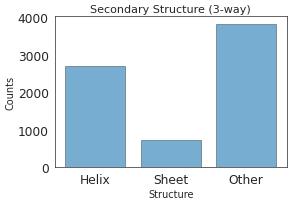

In [5]:
# plot the structure distribution
fig, ax = plt.subplots(dpi=50)

ax.bar(*zip(*structures.items()), label="Test sequences",  alpha=0.6, edgecolor='black')

plt.xticks(rotation=0)
#ax.legend()
ax.set_title("Secondary Structure (3-way)", fontsize=16)
ax.set_xlabel("Structure", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
fig.show()

plt.savefig('secondary_struct.png', bbox_inches = "tight")

###  Secondary Structure (3-way) Per sequence %

In [6]:
# per sequence % of H, E, L

structures = {}
struct_map = {0 : 'Helix', 1 : 'Sheet', 2 : 'Other'}
id = 0
for index, row in secondary_structure.iterrows():
    counts = np.array([row[0].count('H'), row[0].count('E'), row[0].count('L')])
    per_seq_percent = counts / len(row[0])
    structures[id] = per_seq_percent
    id +=1

per_seq_ss = pd.DataFrame.from_dict(structures, orient='index', columns = ['Helix', 'Sheet', 'Other'])

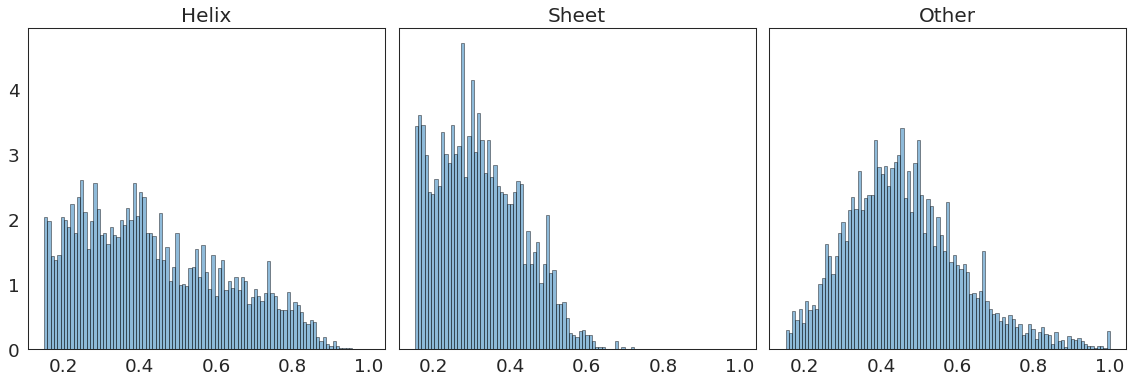

In [7]:
bins=np.linspace(0.15, 1.0, num=100)

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), 
                         sharey=True, facecolor='white', constrained_layout=True, dpi=75.0)

ax1.hist(
    per_seq_ss['Helix'],
    bins=bins,
    label="Per sequence Helix %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax2.hist(
    per_seq_ss['Sheet'],
    bins=bins,
    label="Per sequence Sheet %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax3.hist(
    per_seq_ss['Other'],
    bins=bins,
    label="Per sequence Other %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)

ax.legend()
ax.set_title("Secondary Structure", fontsize=16)

ax1.set_title('Helix')
ax2.set_title('Sheet')
ax3.set_title('Other')




# ax.set_xlabel("Self-consistency TM (scTM) scores", fontsize=14)
# ax.set_ylabel("Normalized frequency", fontsize=14)
ax.axvline(0.5, color='grey', linestyle='--')
fig.show()

### Secondary Structure (8 class)

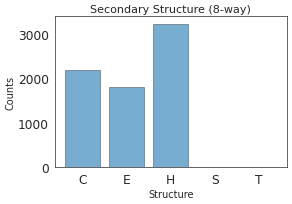

In [8]:
# 8-way structure distribution


structures = {'C':0, 'E':0, 'H':0, 'S':0, 'T':0}
id = 0
struct_map = {0:'C', 1:'E', 2:'H', 3:'S', 4:'T'}
for index, row in secondary_structure_dssp.iterrows():
    counts = np.array([row[0].count('C'), row[0].count('E'), row[0].count('H'), row[0].count('S'), row[0].count('T')])
    struct = struct_map[np.argmax(counts)]
    structures[struct] +=1
    id +=1
    

       
# plot the structure distribution
fig, ax = plt.subplots(dpi=50)

ax.bar(*zip(*structures.items()), label="Test sequences",  alpha=0.6, edgecolor='black')

plt.xticks(rotation=0)
#ax.legend()
ax.set_title("Secondary Structure (8-way)", fontsize=16)
ax.set_xlabel("Structure", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
fig.show()

plt.savefig('secondary_struct_dssp.png', bbox_inches = "tight")

### Secondary Structure (8-way) per sequence %

In [9]:
# per sequence % of H, E, L

structures = {}
struct_map = {0:'C', 1:'E', 2:'H', 3:'S', 4: 'T', 5:'G', 6:'I', 7:'B'}
id = 0
for index, row in secondary_structure_dssp.iterrows():
    counts = np.array([row[0].count('C'), row[0].count('E'), row[0].count('H'), row[0].count('S'), 
                       row[0].count('T'), row[0].count('G'), row[0].count('I'), row[0].count('B')])
    per_seq_percent = counts / len(row[0])
    structures[id] = per_seq_percent
    id +=1

per_seq_ss = pd.DataFrame.from_dict(structures, orient='index', columns = ['C', 'E', 'H', 'S', 'T', 'G', 'I', 'B'])


/users/rvinod/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 1.0, 'Beta Bridge Residue')

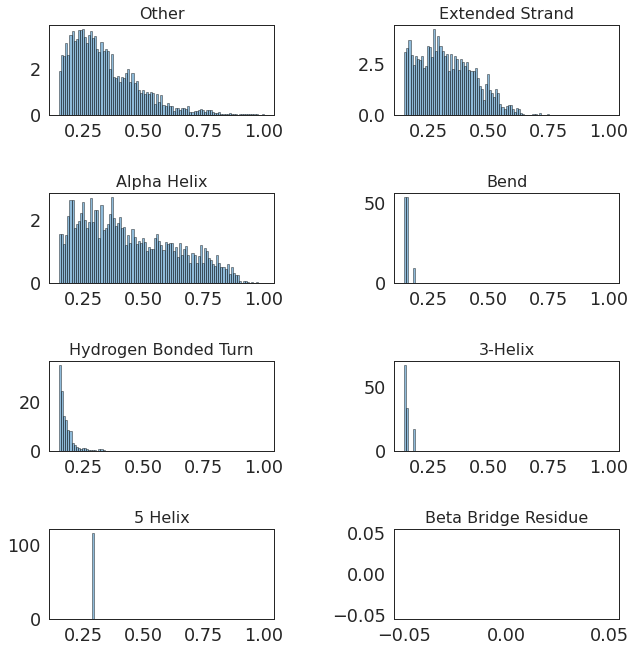

In [10]:
fig, ax = plt.subplots(4, 2, figsize=(10, 10))#, dpi = 100)
bins=np.linspace(0.15, 1.0, num=100)


ax[0, 0].hist(
    per_seq_ss['C'],
    bins=bins,
    label="Per sequence Helix %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[0, 1].hist(
    per_seq_ss['E'],
    bins=bins,
    label="Per sequence Sheet %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[1, 0].hist(
    per_seq_ss['H'],
    bins=bins,
    label="Per sequence Other %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[1, 1].hist(
    per_seq_ss['S'],
    bins=bins,
    label="Per sequence Other %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[2, 0].hist(
    per_seq_ss['T'],
    bins=bins,
    label="Per sequence Other %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[2, 1].hist(
    per_seq_ss['G'],
    bins=bins,
    label="Per sequence Other %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[3, 0].hist(
    per_seq_ss['I'],
    bins=bins,
    label="Per sequence Other %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[3, 1].hist(
    per_seq_ss['B'],
    bins=bins,
    label="Per sequence Other %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)

fig.tight_layout(pad=5.0)

ax[0, 0].set_title('Other', fontsize=16) #C
ax[0, 1].set_title('Extended Strand', fontsize=16) #E
ax[1, 0].set_title('Alpha Helix', fontsize=16) #H
ax[1, 1].set_title('Bend', fontsize=16) #S
ax[2, 0].set_title('Hydrogen Bonded Turn', fontsize=16) #T
ax[2, 1].set_title('3-Helix', fontsize=16) #G
ax[3, 0].set_title('5 Helix', fontsize=16) #I
ax[3, 1].set_title('Beta Bridge Residue', fontsize=16) #B



### Subcellular Localization

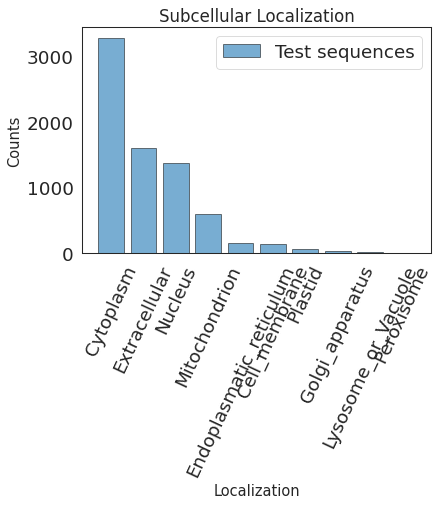

In [11]:
fig, ax = plt.subplots(dpi=75)

keys = list(dict(subcell[0].value_counts()).keys())
values = list(dict(subcell[0].value_counts()).values())

plt.bar(keys, values, tick_label=keys, label="Test sequences",  alpha=0.6, edgecolor='black')

plt.xticks(rotation=65)
ax.legend()
ax.set_title("Subcellular Localization", fontsize=16)
ax.set_xlabel("Localization", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
fig.show()

plt.savefig('subcell.png', bbox_inches = "tight")



### Membrane-bound / Soluble

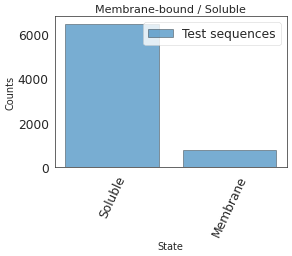

In [12]:
fig, ax = plt.subplots(dpi=50)

keys = list(dict(soluble[0].value_counts()).keys())
values = list(dict(soluble[0].value_counts()).values())

plt.bar(keys, values, tick_label=keys, label="Test sequences",  alpha=0.6, edgecolor='black')

plt.xticks(rotation=65)
ax.legend()
ax.set_title("Membrane-bound / Soluble", fontsize=16)
ax.set_xlabel("State", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
fig.show()

plt.savefig('membrane.png', bbox_inches = "tight")




### Membrane per residue %

In [13]:
# per sequence % of H, E, L

membranes = {}
struct_map = {0 : 'B', 1 : 'H', 2 : 'S', 3: 'i', 4:'o'}
id = 0
for index, row in membrane.iterrows():
    counts = np.array([row[0].count('B'), row[0].count('H'), row[0].count('S'), row[0].count('i'), row[0].count('o')])
    per_seq_percent = counts / len(row[0])
    membranes[id] = per_seq_percent
    id +=1

per_seq_ss = pd.DataFrame.from_dict(membranes, orient='index', columns = ['Transmembrane Beta Strand', 
                                                                          'Transmembrane alpha helix', 'Signal peptide',
                                                                         'Non-Transmembrane, inside', 'Non-Transmembrane, outside'])

/users/rvinod/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 1.0, 'Non-Transmembrane, outside')

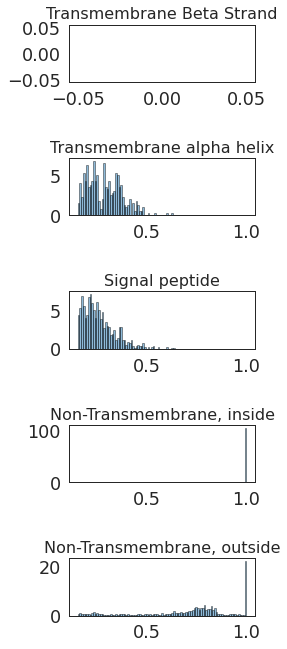

In [14]:
bins=np.linspace(0.15, 1.0, num=100)



fig, ax = plt.subplots(5, figsize=(5, 10))#, dpi = 100)

ax[0].hist(
    per_seq_ss['Transmembrane Beta Strand'],
    bins=bins,
    label="Per sequence Helix %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[1].hist(
    per_seq_ss['Transmembrane alpha helix'],
    bins=bins,
    label="Per sequence Sheet %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[2].hist(
    per_seq_ss['Signal peptide'],
    bins=bins,
    label="Per sequence Other %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[3].hist(
    per_seq_ss['Non-Transmembrane, inside'],
    bins=bins,
    label="Per sequence Other %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[4].hist(
    per_seq_ss['Non-Transmembrane, outside'],
    bins=bins,
    label="Per sequence Other %",
    density=True,
    alpha=0.5,
    edgecolor='black',
)

fig.tight_layout(pad=5.0)

ax[0].set_title('Transmembrane Beta Strand', fontsize=16) #C
ax[1].set_title('Transmembrane alpha helix', fontsize=16) #E
ax[2].set_title('Signal peptide', fontsize=16) #H
ax[3].set_title('Non-Transmembrane, inside', fontsize=16) #S
ax[4].set_title('Non-Transmembrane, outside', fontsize=16) #T





### Disorder

In [15]:
#disorder

In [74]:
# per sequence % of H, E, L
disorder_dict = {}
id = 0
for i in range (disorder.shape[0]):
    dis = sum(x > 8 for x in list(disorder.iloc[i]))
    per_seq_percent = dis / len(list(disorder.iloc[i]))
    disorder_dict[i] = per_seq_percent

per_seq_ss = pd.DataFrame.from_dict(disorder_dict, orient='index', columns = ['disorder'])

,disorder
0,0.531250
1,0.609375
2,0.226562
3,0.320312
4,0.960938
...,...
7247,0.320312
7248,0.023438
7249,0.195312
7250,0.070312


In [ ]:
bins=np.linspace(0.15, 1.0, num=100)


fig, ax = plt.subplots(1, figsize=(5, 10))#, dpi = 100)

ax[0].hist(
    per_seq_ss['sm_mol'],
    bins=bins,
    label="Test",
    density=True,
    alpha=0.5,
    edgecolor='black',
)


fig.tight_layout(pad=5.0)

ax[0].set_title('Per sequence % disorder', fontsize=16) #C







### Per Seq % Small Molecule Binding

In [58]:
binding = {}
id = 0
for i in range (binding_small_mol.shape[0]):
    sm_mol = list(binding_small_mol.iloc[i])[0].count('S')
    nucleic = list(binding_nucleic.iloc[i])[0].count('N')
    metal = list(binding_metal.iloc[i])[0].count('M')
    per_seq_percent = [sm_mol, nucleic, metal] #/ len(list(binding_small_mol.iloc[i])[0])
    per_seq_percent = map(lambda x: x/len(list(binding_small_mol.iloc[i])[0]), per_seq_percent)
    binding[i] = list(per_seq_percent)


per_seq_ss = pd.DataFrame.from_dict(binding, orient='index', columns = ['sm_mol', 
                                                                          'nucleic', 'metal'])                                                        

Text(0.5, 1.0, 'Metal Acid Binding')

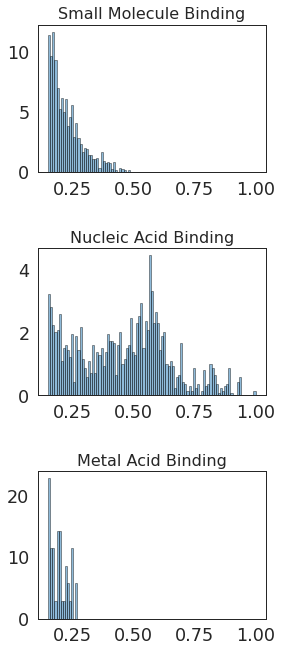

In [60]:
bins=np.linspace(0.15, 1.0, num=100)


fig, ax = plt.subplots(3, figsize=(5, 10))#, dpi = 100)

ax[0].hist(
    per_seq_ss['sm_mol'],
    bins=bins,
    label="Test",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[1].hist(
    per_seq_ss['nucleic'],
    bins=bins,
    label="Test",
    density=True,
    alpha=0.5,
    edgecolor='black',
)
ax[2].hist(
    per_seq_ss['metal'],
    bins=bins,
    label="Test",
    density=True,
    alpha=0.5,
    edgecolor='black',
)



fig.tight_layout(pad=5.0)

ax[0].set_title('Small Molecule Binding', fontsize=16) #C
ax[1].set_title('Nucleic Acid Binding', fontsize=16) #E
ax[2].set_title('Metal Acid Binding', fontsize=16) #H




